# <center> <h1>Assignment 6</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2020</h1> </center>

You will build a decision tree model using a data set related to breast cancer (Breast Cancer Wisconsin (Diagnostic) Data Set). You can have more info about the data set in this <a href="http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29">web-site</a>. 

You can use this link: https://sites.google.com/site/yasinunlu/home/research/new1/breast_cancer.csv to dowload the data in csv format. In this dataset there are 30 features and one response variable. It is highly likely to predict breast cancer by using a decision tree model and given the set of predictors for a number of observations.

The column named "diagnosis" shows whether a patient is diagnosed as "malignant" (M) or "benign" (B). Use this dataset to answer the questions below. You can create as many cells as you desire for all solutions.<br/>

## Questions:
1. Read the data into a dataframe from csv file source. Download link is given above.   
2. Remove any irrelevant data columns from the dataframe. If there are any missing values in the dataset, they should be replaced through a data imputation method. Any missing rows should be deleted from the dataset. Each column data type must be converted into an appropriate data type. The data types can be obtained either in data info files or can be determined by inspection.  
3. Convert categorical variables in "diagnosis" column into integer numerical values.  
4. Transform the data so that it fits within a specific scale (0 and 1).  
5. Create two dataframes: response and features. Split these dataframes into train and test parts.  
6. Train a decision tree model using train part of the data.  
7. Generate predictions over the test data.  
8. Calculate the accuracy.   
    - Write code that calculates the accuracy over test data.  
    - Call the built-in function from scikit learn package to calculate the accuracy over test data.  
9. Report and interpret the confusion matrix.  
10. Report feature importance results. Create a dataframe that has two columns: one for the name of the feature and one for the associated score.  

## 1) Read the data into a dataframe from csv file source. Download link is given above.   

In [1]:
import pandas as pd
cancer = pd.read_csv("breast_cancer.csv")
# cancer = pd.read_csv("https://sites.google.com/site/yasinunlu/home/research/new1/breast_cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2) Remove any irrelevant data columns from the dataframe. 
* If there are any missing values in the dataset, they should be replaced through a data imputation method.  
* Any missing rows should be deleted from the dataset.  
* Each column data type must be converted into an appropriate data type. 
* The data types can be obtained either in data info files or can be determined by inspection.  

In [2]:
# remove the id collumn
df = cancer.drop("id", axis=1)

# check for any missing values
df.isna().any().sum()  # no missing data values in the dataframe!

0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

There don't appear to be any missing data values in the dataframe and all collumns are of type *float* except `diagnosis` which we will convert to *integer* in the next step.

In [ ]:
df

## 3) Convert categorical variables in "diagnosis" column into integer numerical values.  

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
df['diagnosis'] = df.diagnosis.map({"M":0, "B":1})

df.diagnosis  # looks like M=0 and B=1

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

## 4) Transform the data so that it fits within a specific scale (0 and 1).  

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(data_normalized, columns = df.columns.to_list())

df_normalized.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## 5) Create two dataframes: response and features. Split these dataframes into train and test parts.  

In [8]:
from sklearn.model_selection import train_test_split
features = df.iloc[:,1:]
response = df[["diagnosis"]]

result_list = train_test_split(features, response, test_size=0.2, random_state=64)
features_train, features_test, response_train, response_test = result_list

print("full df_clean:", df.shape)
print("features_train:", features_train.shape)
print("features_test:", features_test.shape)
print("response_train:", response_train.shape)
print("response_test:", response_test.shape)

full df_clean: (569, 31)
features_train: (455, 30)
features_test: (114, 30)
response_train: (455, 1)
response_test: (114, 1)


## 6) Train a decision tree model using train part of the data.  

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 86)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=86, splitter='best')

## 7) Generate predictions over the test data.  

In [10]:
response_pred = classifier.predict(features_test)

pred_df = pd.DataFrame(response_pred, columns=['Predictions'])
pred_df['Actuals'] = list(response_test.diagnosis)

pred_df['Difference'] = abs(pred_df['Predictions'] - pred_df['Actuals'])
pred_df

,Predictions,Actuals,Difference
0,0,1,1
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
109,0,0,0
110,1,1,0
111,0,0,0
112,0,0,0


## 8) Calculate the accuracy.   

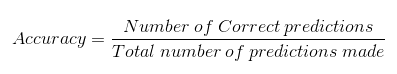

Accuracy = (Number of correct predictions) / (Total number of predictions)

* By taking the **absolute value** of the difference between `Predictions` and `Actuals`, I will create a `Difference` collumn indicating the number of incorrect predictions 
    - Correct predictions will be 0: 1-1=0;   0-0=0  
    - Incorrect predictions will be 1:  1-0=1;  |0-1|=1  
* Summing this collumn and subtracting from the total number of predictions will give the numerator (Number of correct predictions)
* Then divide by the total number of predicitons

In [11]:
# a) Write code that calculates the accuracy over test data.
pred_df['Difference'] = abs(pred_df['Predictions'] - pred_df['Actuals'])

# Accuracy = (Number of correct predictions) / (Total number of predictions)
my_accuracy = (len(pred_df) - sum(pred_df.Difference)) / (len(pred_df))
print('My accuracy calculation: ', my_accuracy)

My accuracy calculation:  0.9035087719298246


In [12]:
# b) Call the built-in function from scikit learn package to calculate the accuracy over test data.  
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=response_test, y_pred=response_pred)
print('Accuracy Score on test data: ', accuracy)

Accuracy Score on test data:  0.9035087719298246


In [13]:
# test if they are the same
my_accuracy == accuracy

True

## 9) Report and interpret the confusion matrix.  

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(response_test, response_pred)
print(cm)

[[34  4]
 [ 7 69]]


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(response_test, response_pred)
print(cm)

[[69  7]
 [ 4 34]]


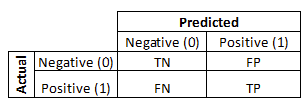

### Interpretation:
The `LabelEncoder` changed Diagnosis to:  
* B = 0 for benign tumors
* M = 1 for malignant tumors

Therefore, the model correctly classified 69 benign tumors as benign (true negative), and 34 malignant tumors as malignant (true positive).  
It incorrectly classified 7 benign tumors as malignant (false positive), and 4 malignant tumors as benign (false negative).

## 10) Report feature importance results. 
Create a dataframe that has two columns: one for the name of the feature and one for the associated score.  

In [16]:
importance = classifier.feature_importances_
feature_names = features.columns.to_list()

feature_importance_df = pd.DataFrame(feature_names, columns=['features'])
feature_importance_df['importance'] = importance
feature_importance_df

,features,importance
0,radius_mean,0.000000
1,texture_mean,0.018128
2,perimeter_mean,0.009116
3,area_mean,0.000000
4,smoothness_mean,0.000000
5,compactness_mean,0.000000
6,concavity_mean,0.000000
7,concave points_mean,0.000000
8,symmetry_mean,0.000000
9,fractal_dimension_mean,0.000000


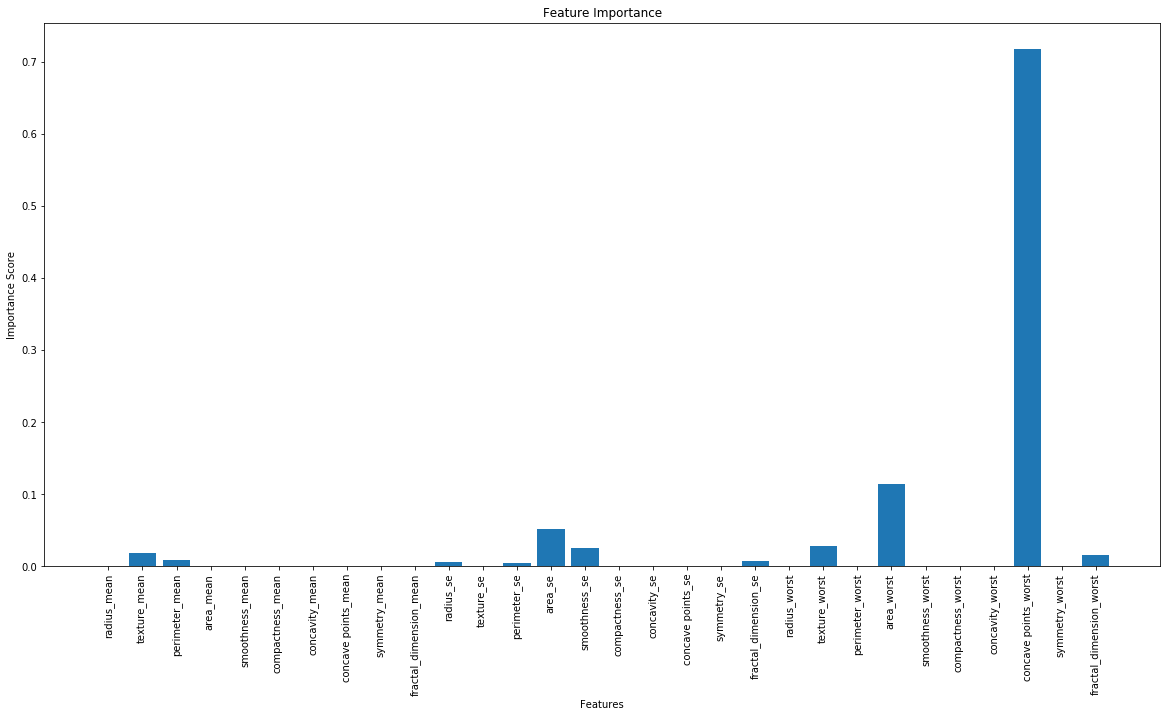

In [17]:
from matplotlib import pyplot
pyplot.figure(figsize=(20, 10))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.xticks(rotation=90)
pyplot.show()